In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import skops.io as sio
import os

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [3]:
X = iris.data
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 105, Test samples: 45


In [5]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [6]:
pipe.fit(X_train, y_train)

,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [7]:
predictions = pipe.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='macro')

print(f"Accuracy: {accuracy:.2%}, F1 Score: {f1:.2f}")

Accuracy: 100.00%, F1 Score: 1.00


In [9]:
with open("Results/metrics.txt", "w") as f:
    f.write(f"\nAccuracy = {accuracy:.2f}, F1 Score = {f1:.2f}")

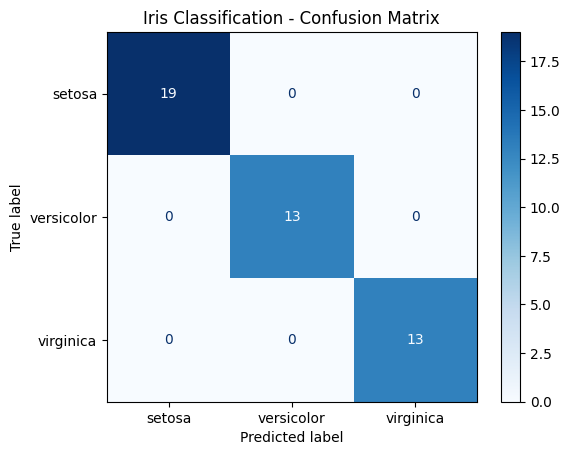

In [10]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=iris.target_names
)
disp.plot(cmap='Blues')
plt.title("Iris Classification - Confusion Matrix")
plt.savefig("Results/confusion_matrix.png", dpi=120, bbox_inches='tight')

In [11]:
sio.dump(pipe, "Model/iris_pipeline.skops")